In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mapping Function
def generate_phi_and_intialize_weights(X, degree):
    array_of_ones = np.ones(len(X)).reshape(len(X),1)
    X_train_design = X
    
    if (degree != 0):
        for i in range(2,degree+1):
            X_train_design = np.hstack((X_train_design,np.power(X,i)))
        X_train_design = np.hstack((X_train_design,array_of_ones))
        
        weights = np.random.randn(1,degree+1)
        return weights, X_train_design
    
    else:
        weights = np.random.randn(1,degree+1)
        return weights, X_train_design.reshape(len(X),1)

In [3]:
def calculate_output(w,X):
    return np.dot(X,w)
def cost_function(w,X,t):
    y = calculate_output(w,X)
    cost = np.sum(np.power(y - t,2))
    return cost

In [15]:
def linear_reg_with_polynomial_model(N_train,N_test,train_std,test_std,max_degree,plot_data=False,plot_polynomials=False,seed=0):
    max_degree = max_degree+1
    if(seed):
        np.random.seed(seed)
    
    # Training Data Set
    X_train = np.random.uniform(0,1,N_train).reshape(N_train,1)
    noise = (np.random.randn(N_train) * train_std).reshape(N_train,1)
    t_train = np.sin( 2*np.pi*X_train ) + noise
    if(plot_data):
        plt.figure()
        plt.scatter(X_train,t_train)
    
    X_test = np.random.uniform(0,1,N_test).reshape(N_test,1)
    noise = (np.random.randn(N_test) * test_std).reshape(N_test,1)
    t_test = np.sin( 2*np.pi*X_test ) + noise
    if(plot_data):
        plt.figure()
        plt.scatter(X_test,t_test)
    
    x_mesh_array = np.linspace(0,1,1000).reshape(1000,1)

    E_train = np.zeros([max_degree,1])
    E_test = np.zeros([max_degree,1])

    for i in range(max_degree):
        _, X_curr = generate_phi_and_intialize_weights(X_train, i)
        _, X_curr_test = generate_phi_and_intialize_weights(X_test, i)
        w = np.dot(np.dot(np.linalg.inv(np.dot(X_curr.T,X_curr)),X_curr.T),t_train)


        _, x_mesh = generate_phi_and_intialize_weights(x_mesh_array, i)
        
        E_train[i] = np.sqrt(cost_function(w,X_curr,t_train)/N_train)
        E_test[i] = np.sqrt(cost_function(w,X_curr_test,t_test)/N_test)
        
        if(plot_polynomials):
            plt.figure()
            plt.title('Degree: ' + str(i))
            y = x_mesh@w
            y.shape
            plt.plot(x_mesh[:,0], y,'g')
            plt.scatter(X_train,t_train,marker = '*')

            y = x_mesh@w
            y.shape
            plt.scatter(X_test,t_test,marker = 'x')

            plt.legend(['Learnt Curve','Train Data', 'Test Data'])

#             print('Training Error for M = ' + str(i) + ': ' + str(E_train[i]))
#             print('Testing Error for M = ' + str(i) + ': ' + str(E_test[i]))
#             print('\n')
        
    
    plt.figure()    
    plt.plot(range(max_degree),E_train,marker='o')
    plt.plot(range(max_degree),E_test,marker='o')

    plt.xlim([-1,max_degree+1])

    plt.legend(['Training Error', 'Testing Error'])
    plt.title('N_Train = ' + str(N_train))
    
    print('Least Gap at M = ', np.argmin(np.absolute(E_train-E_test)))
    
    

Least Gap at M =  0
Least Gap at M =  2


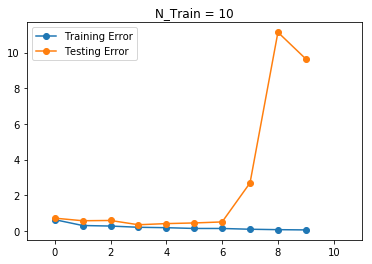

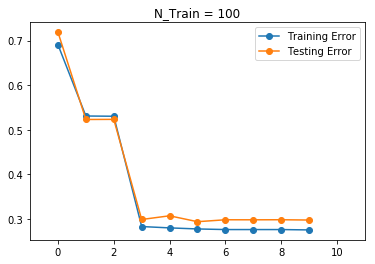

In [19]:
seed = int(np.random.rand(1)*100)
seed = 65535
linear_reg_with_polynomial_model(10,100,0.3,0.3,9,False,False,seed = seed)
linear_reg_with_polynomial_model(100,100,0.3,0.3,9,False,False,seed = seed)

Least Gap at M =  4


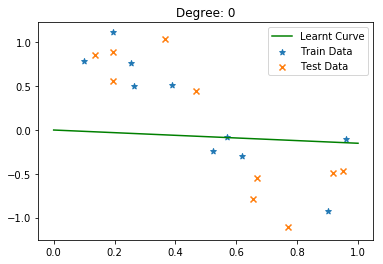

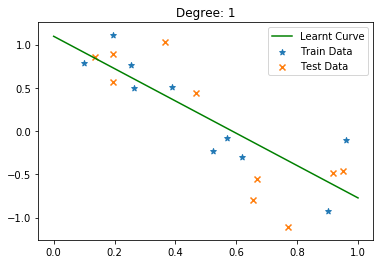

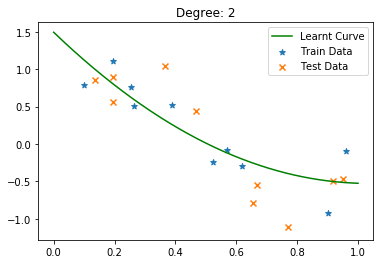

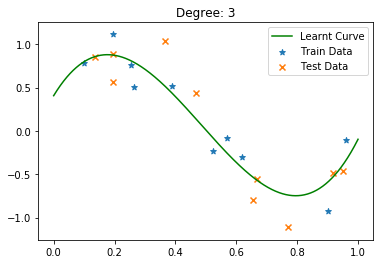

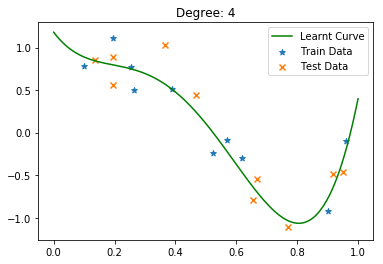

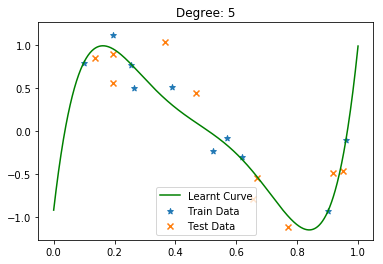

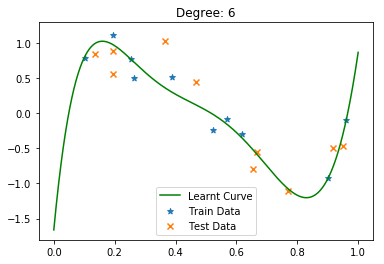

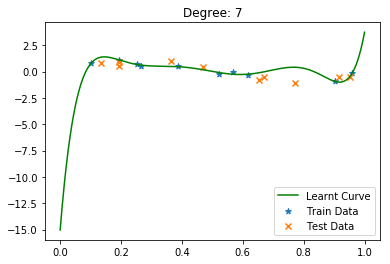

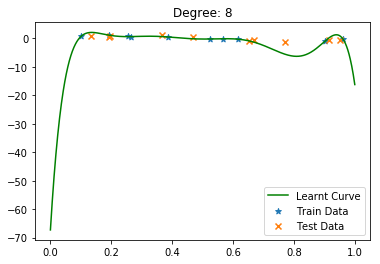

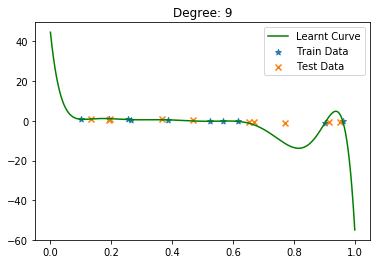

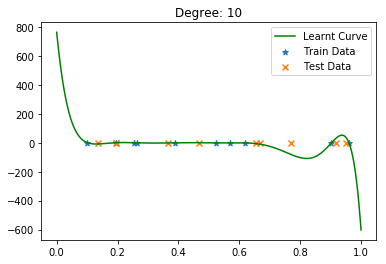

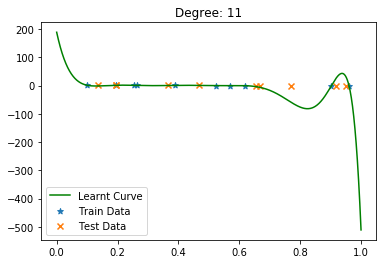

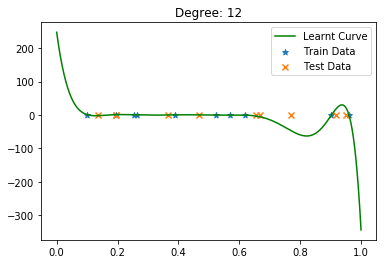

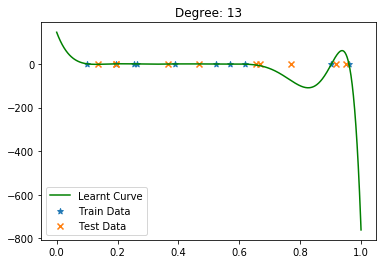

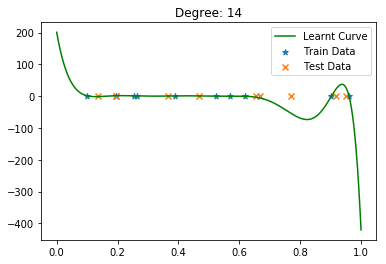

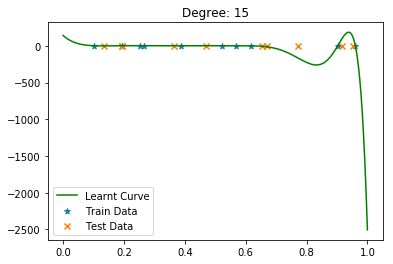

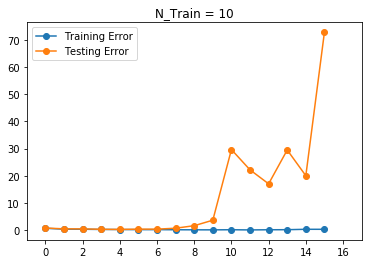

In [18]:
# linear_reg_with_polynomial_model(10,10,0.3,0.3,15,False,True,seed = seed)